In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
x_data = np.array([1, 2, 3, 4])
y_data = x_data * 2
print(x_data)
print(y_data)
#b = np.array([6 , -6, 6, 36, 90, 174, 294, 456, 666, 930, 1254, 1644, 2106, 2646, 3270, 3984, 4794, 5706, 6726, 7860])

#b = np.array([10, 20, 34, 88, 158, 260, 400, 584, 818, 1108, 1460, 1880])

a_test = np.array([13, 14])


[1 2 3 4]
[2 4 6 8]


In [6]:
from tensorflow.keras.utils import plot_model

# model에 순차적으로 레이어를 쌓는다
model = keras.Sequential([
# model에 층층이 추가, 첫번째 layer는 input_shape를 명시할것!
    keras.layers.Dense(32,input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])

# 컴파일
model.compile(loss='mse', optimizer='adam')

epcount = 4000
# 학습
learn_History = model.fit(x_data, y_data, epochs=epcount, verbose=0)

model.summary()

model.save('model.h5') # 학습모델 저장

# 정확도 검사
#model.evaluate(a_test, b_test, bat
# 예측
print('=========================정답=========================\n', y_data, '\n=========================결과=========================\npredict:', model.predict(x_data).flatten())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________
=========================정답=========================
 [2 4 6 8] 
=========================결과=========================
predict: [2. 4. 6. 8.] 1


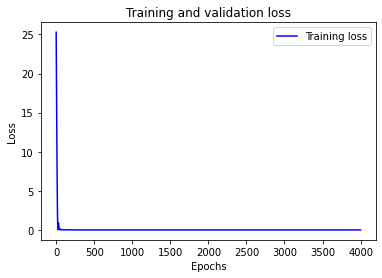

In [7]:
import matplotlib.pyplot as plt

loss = learn_History.history['loss']
#val_loss = learn_History.history['val_loss']

epochs = range(epcount)

plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()